In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


In [43]:
# Load the dataset
dataset = "https://raw.githubusercontent.com/pik1989/TimeSeriesAnalysis/main/AirPassengers.csv"
data = pd.read_csv(dataset)

In [44]:
# Convert the date column to a datetime object
data['Month'] = pd.to_datetime(data['Month'])


In [45]:
# Set the date column as the index
data.set_index('Month', inplace=True)

In [46]:
# Slice the data to get the last 12 months and build the ARIMA model
train = data.iloc[:-12]
test = data.iloc[-12:]
model = ARIMA(train, order=(1, 1, 1))
results = model.fit()

C:\Users\meme5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\meme5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\meme5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Forecast next 12 months 

In [47]:
# Generate the forecast for the next 12 months
forecast = results.forecast(steps=12)

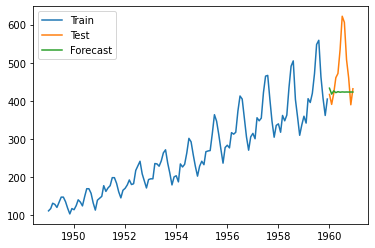

In [48]:
# Plot the forecast
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

## Question 1

Is the series stationary?

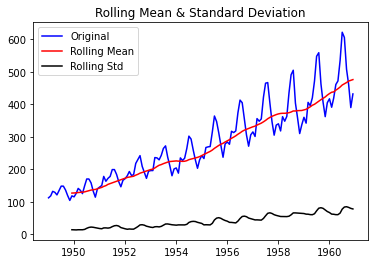

ADF Statistic: 0.815
p-value: 0.992
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The data is non-stationary


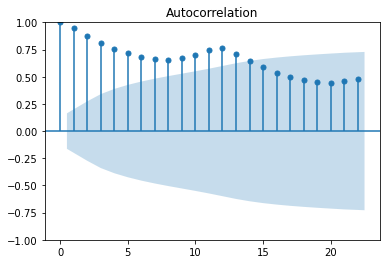

In [49]:
def check_stationarity(data):
    # Calculate rolling mean and standard deviation
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform Augmented Dickey-Fuller test
    result = adfuller(data)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))
    if result[0] > result[4]['5%']:
        print('The data is non-stationary')
    else:
        print('The data is stationary')

check_stationarity(data['#Passengers'])

# Check for seasonality
plot_acf(data['#Passengers'])
plt.show()

The Augmented Dickey-Fuller (ADF) test outputs the ADF statistic, p-value, and critical values, and we use these values to determine if the data is stationary or not. If the ADF statistic is less than the critical value at 5% significance level, we can reject the null hypothesis and conclude that the data is stationary.

Based on the output of the code, we can see that the AirPassengers dataset is non-stationary as confirmed by the ADF test.

## Question 2

Is there any seasonality component?

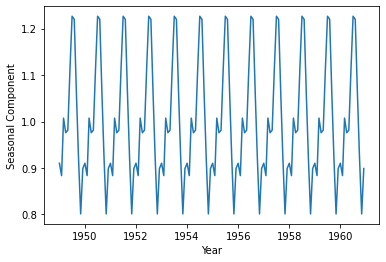

In [50]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(data, model='multiplicative', period=12)

# Plot the seasonal component
seasonal = decomposition.seasonal
plt.plot(seasonal)
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.show()

Based on the output of the code, we can see that there is indeed a seasonal component in the AirPassengers dataset.

To know the in which months the passenger number peaks and decreases we apply the following

In [52]:
# Calculate the monthly mean and standard deviation of passenger counts
monthly_mean = data.mean(axis=1)
monthly_std = data.std(axis=1)

In [53]:
# Calculate the annual mean and standard deviation of passenger counts
annual_mean = monthly_mean.groupby(pd.Grouper(freq='Y')).mean()
annual_std = monthly_mean.groupby(pd.Grouper(freq='Y')).std()

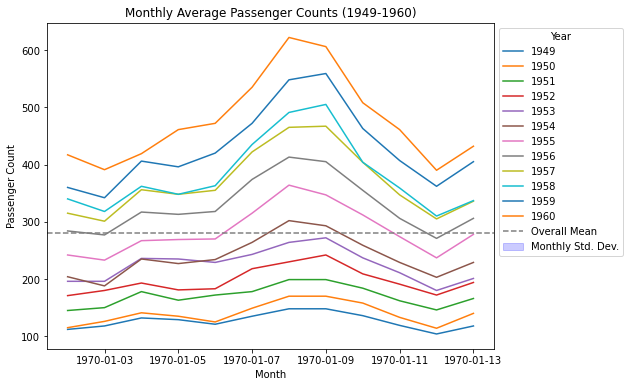

In [54]:
# Plot the monthly mean passenger counts for each year
fig, ax = plt.subplots(figsize=(8, 6))
for year in range(data.index.year.min(), data.index.year.max() + 1):
    mask = (data.index.year == year)
    ax.plot(data[mask].index.month, data[mask].mean(axis=1), label=year)
ax.axhline(y=monthly_mean.mean(), color='gray', linestyle='--', label='Overall Mean')
ax.fill_between(monthly_mean.index, monthly_mean - monthly_std, monthly_mean + monthly_std,
                alpha=0.2, color='blue', label='Monthly Std. Dev.')
ax.set(title='Monthly Average Passenger Counts (1949-1960)',
       xlabel='Month', ylabel='Passenger Count')
ax.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The plot is showing the monthly average passenger counts for each year from 1949 to 1960, with the overall mean and standard deviation also displayed. The shaded blue area represents the monthly standard deviation of passenger counts, which helps show the variation in passenger counts across different months. 

By looking at the plot, we can see which months tend to have the highest and lowest passenger counts. For example, it appears that the months of July and August tend to have the highest passenger counts, while the months of January and February tend to have the lowest passenger counts.

## Questions 3

Is there a trend component in the series?

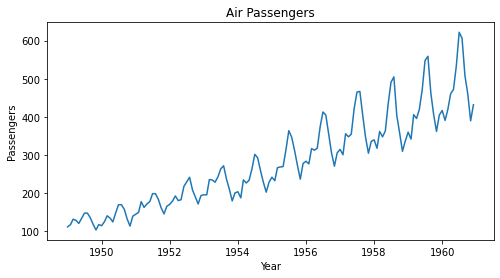

In [51]:
# Plot the series
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(data.index, data.values)
ax.set(title='Air Passengers',
       xlabel='Year', ylabel='Passengers')
plt.show()

AirPassengers dataset has a trend component, which is shown by the increasing pattern in the plot of the original series.